# Exploratory Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math

import numpy as np

In [4]:
df=pd.read_csv('../../data/prd/RND Topic Modelling/abstracts_federal_reporter_combined.csv',engine='python')

In [5]:
df.head()

,PROJECT_ID,ABSTRACT,FY,FIRST_CHAR,LAST_CHAR,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_TITLE,PROJECT_TERMS,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,ORGANIZATION_NAME,CFDA_CODE,FY_TOTAL_COST
0,89996,"This is a project to explore Game-based, Metap...",2008,"This is a project to explore Game-based, Metap...",.,NSF,NSF,NaN,0814512,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,Achievement; analog; base; Cognitive Science; ...,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",WHEELING JESUIT UNIVERSITY,47.076,1999467.0
1,89997,Institution: Franklin Institute Science Museum...,2008,Institution: Franklin Institute Science Museum...,.,NSF,NSF,NaN,0741659,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,Active Learning; Child; Computer software; des...,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",FRANKLIN INSTITUTE,47.076,1799699.0
2,89998,Through programs (including small group conver...,2008,Through programs (including small group conver...,.,NSF,NSF,NaN,0813522,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,Address; Age; Birth; Brain; Caregivers; Child;...,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",SCIENCE MUSEUM OF MINNESOTA,47.076,1505858.0
3,89999,In partnership with the American Chemical Soci...,2008,In partnership with the American Chemical Soci...,.,NSF,NSF,NaN,0838627,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,Advanced Development; American; Chemicals; Che...,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,47.049,51000.0
4,90000,Amphibian populations around the world are exp...,2008,Amphibian populations around the world are exp...,.,NSF,NSF,NaN,0815315,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,Amphibia; Central America; Communicable Diseas...,"ZAMUDIO, KELLY R",NaN,CORNELL UNIVERSITY ITHACA,47.074,370996.0


In [4]:
df['FY'].value_counts()


2008    94846
2012    64056
2009    53413
2013    53345
2010    46349
2014    43325
2011    42761
2015    42252
2016    39681
2018    35441
2017    34619
Name: FY, dtype: int64

Text(0,0.5,'Number of Abstracts')

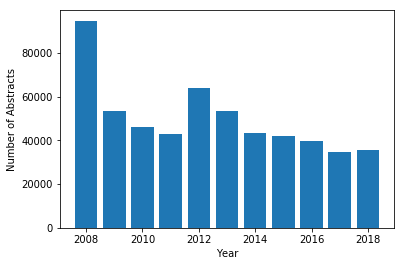

In [5]:
plt.bar(df['FY'].value_counts().index, df['FY'].value_counts())
plt.xlabel('Year')
plt.ylabel('Number of Abstracts')

In [6]:
df['DEPARTMENT'].value_counts()

HHS     375441
NSF     116510
USDA     27304
NASA     16006
DOD       6951
VA        4860
EPA       1560
ED        1456
Name: DEPARTMENT, dtype: int64

Text(0,0.5,'Number of Abstracts')

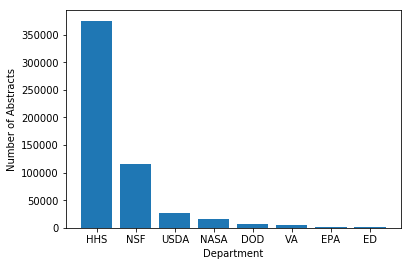

In [7]:
plt.bar(df['DEPARTMENT'].value_counts().index, df['DEPARTMENT'].value_counts())
plt.xlabel('Department')
plt.ylabel('Number of Abstracts')

In [8]:
df['AGENCY'].value_counts()

NIH        367697
NSF        116510
NIFA        25406
NASA        16006
CDMRP        6700
VA           4860
ALLCDC       2684
AHRQ         2581
ARS          1653
EPA          1560
IES          1456
FDA          1397
NIDILRR       800
ACF           282
FS            245
CNRM          130
DVBIC          99
CCCRP          22
Name: AGENCY, dtype: int64

Text(0,0.5,'Number of Abstracts')

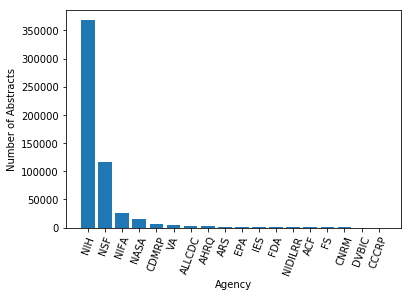

In [9]:
plt.bar(df['AGENCY'].value_counts().index, df['AGENCY'].value_counts())
plt.xlabel('Agency')
plt.xticks(rotation=70)
plt.ylabel('Number of Abstracts')

In [10]:
df['AGENCY'][df['DEPARTMENT'] == 'HHS'].value_counts()

NIH        367697
ALLCDC       2684
AHRQ         2581
FDA          1397
NIDILRR       800
ACF           282
Name: AGENCY, dtype: int64

### NIH abstracts are taking over the topics.  Possible solution: use a topic model per department and/or agency.

In [11]:
df['FY_TOTAL_COST'].describe()

count    4.256850e+05
mean     4.509841e+05
std      1.727112e+06
min      1.000000e+00
25%      1.390020e+05
50%      2.917820e+05
75%      4.500000e+05
max      3.227983e+08
Name: FY_TOTAL_COST, dtype: float64

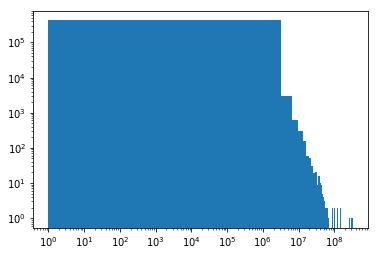

In [43]:
x = df['FY_TOTAL_COST'][df['FY_TOTAL_COST'].notna()]

plt.hist(x, bins=100)
plt.xscale('log')
plt.yscale('log')
#df['FY_TOTAL_COST'][0:40].values

In [13]:
df['ORGANIZATION_NAME'].value_counts()

NATIONAL INSTITUTES OF HEALTH                 30155
THE JOHNS HOPKINS UNIVERSITY                   8948
UNIVERSITY OF MICHIGAN AT ANN ARBOR            8733
UNIVERSITY OF WASHINGTON                       8630
STANFORD UNIVERSITY                            7894
UNIVERSITY OF PENNSYLVANIA                     7574
UNIVERSITY OF CALIFORNIA SAN FRANCISCO         7419
UNIVERSITY OF CALIFORNIA SAN DIEGO             7341
UNIVERSITY OF CALIFORNIA LOS ANGELES           7094
THE UNIVERSITY OF PITTSBURGH                   6696
UNIVERSITY OF NORTH CAROLINA CHAPEL HILL       6194
YALE UNIVERSITY                                6137
WASHINGTON UNIVERSITY                          6021
UNIVERSITY OF MINNESOTA TWIN CITIES            5915
DUKE UNIVERSITY                                5911
UNIVERSITY OF WISCONSIN MADISON                5899
UNIVERSITY OF CALIFORNIA DAVIS                 5040
EMORY UNIVERSITY                               4915
VANDERBILT UNIVERSITY                          4899
MASSACHUSETT